Trong bộ dữ liệu Tiết kiệm nhiên liệu , nhiệm vụ của bạn là dự đoán mức tiết kiệm nhiên liệu của ô tô dựa trên các đặc điểm như loại động cơ hoặc năm sản xuất ô tô.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [3]:
fuel = pd.read_csv('fuel.csv')
fuel

,Model Year,Division,Carline,Eng Displ,# Cyl,City FE,Hwy FE,Comb FE
0,2016,ALFA ROMEO,4C,1.8,4,24,34,28
1,2016,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,12,18,14
2,2016,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,14,21,16
3,2016,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,13,19,15
4,2016,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,14,21,16
...,...,...,...,...,...,...,...,...
1200,2016,TOYOTA,SEQUOIA 4WD FFV,5.7,8,13,17,14
1201,2016,Volkswagen,Touareg,3.0,6,21,29,24
1202,2016,Volkswagen,Touareg,3.6,6,17,23,19
1203,2016,Volvo,XC90 AWD,2.0,4,20,25,22


In [4]:
X = fuel.copy()
# Remove target
y = X.pop('City FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [816]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Hãy xem dữ liệu nếu bạn thích. Mục tiêu của chúng tôi trong trường hợp này là cột 'City FE' và các cột còn lại là các tính năng.

In [5]:
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,806,807,808,809,810,811,812,813,814,815
0,0.0,-1.010390,-0.886445,0.966471,0.845284,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.132948,3.468972,-1.706924,-1.670140,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.160010,1.291264,-1.205663,-1.310793,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.160010,1.291264,-1.539837,-1.490466,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.160010,1.291264,-1.205663,-1.310793,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Chạy ô tiếp theo để xác định mạng mà chúng ta sẽ sử dụng cho tác vụ này.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

# 1) Add Loss and Optimizer



In [7]:
# YOUR CODE HERE
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)



# 2) Train Model


In [8]:
# YOUR CODE HERE
history = model.fit(
    x = X, y = y,
    batch_size = 128,
    epochs = 200,
)


Epoch 1/200
10/10 [==============================] - 1s 9ms/step - loss: 2.8337
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 2.0420
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 0.8651
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.5513
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3290
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.2182
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1446
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 0.1062
Epoch 9/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0846
Epoch 10/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0752
Epoch 11/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0757
Epoch 12/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0693
Epoch 13/200
10/10 [=================

Bước cuối cùng là xem xét các đường cong mất mát và đánh giá quá trình đào tạo. Chạy ô bên dưới để có biểu đồ về tổn thất đào tạo.

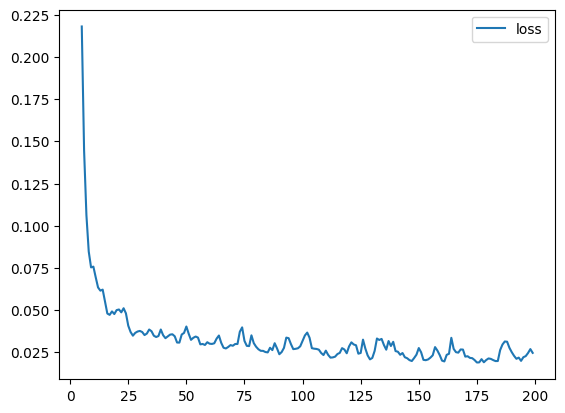

In [9]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();